<div class="row">
  <div class="column" style="float:left;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/1200px-Scikit_learn_logo_small.svg.png" width=200 height=200 />
  </div>
  <div class="column" style="float:left; padding:10px">
<img src="https://miro.medium.com/max/2436/1*Uowkdl_riYAj4ZGtV0EZ1Q.png" width=200 height=300 />
  </div>
  <div class="column" style="float:right;">
      <p>Author: Marko Mlakar</p>
      <a href="https://www.linkedin.com/in/marko-mlakar-b37483172/">
        <img border="0" alt="LinkedIn" src="https://image.flaticon.com/icons/png/512/174/174857.png" width="20" height="20">
      </a>
      <a href="https://github.com/MarkoMlakar/">
        <img border="0" alt="GiutHub" src="https://cdn2.iconfinder.com/data/icons/font-awesome/1792/github-square-512.png" width="20" height="20">
      </a>
  </div>
</div>

# Solving classification problems with Scikit-learn compatible Neuroevolution and Weight Agnostic Neural Networks
For the past couple of months, I've been doing a lot of research about neuroevolution. The idea is that instead of relying on a fixed topology of a neural network the topology and parameters are evolved through evolution. Typically when creating a neural network one must select the structure and hyperparameters that will work best for a given task. This can sometimes be frustrating because you are not sure that your solution is the best (optimal) one.
#### NeuroEvolution of Augmenting Topologies (NEAT)
We used a genetic algorithm called NeuroEvolution of Augmenting Topologies (NEAT) which was developed by Kenneth O. Stanley and Risto Miikkulainen in 2002. The algorithm alters the weight parameters and the topology of a neural network to find the balance between fitness and diversity. NEAT shows how it's possible for evolution to both optimize and complexify the solutions simultaneously over generations. If you want to get a deeper understanding of the NEAT algorithm I suggest reading the original papper: http://nn.cs.utexas.edu/downloads/papers/stanley.ec02.pdf
#### Weight Agnostic Neural Networks (WANN)
Weight Agnostic Neural Networks (WANNs) is a method developed by Adam Gaier and David Ha in 2019. The algorithm is inspired by NEAT and focuses on evolving only the topology of the neural network without evolving the weights. It is a search method for topologies that can perform a task without explicit weight training. The end result is a minimal neural network topology where with a single shared weight parameter. The algorithm for developing WANNs can be summarized in the image below:
<img src="https://storage.googleapis.com/quickdraw-models/sketchRNN/wann/png/schematic.png" width=500 height=700 />
If you want to know more about Weight Agnostic Neural Networks I suggest reading the original paper: https://weightagnostic.github.io/
#### Scikit-learn compatible estimator
Since NEAT and WANNs can be used to solve supervised learning problems I decided to make them Scikit-learn compatible. I followed the scikit-learn estimator guidelines and implemented neat-python to be compatible with the open-source ML library. Since the original code for WANNs (https://github.com/google/brain-tokyo-workshop/tree/master/WANNRelease) is created very minimal rather than general I decided to upgrade neat-python source code (more readable code) with the WANN algorithm. If you want to know more about how I upgraded neat-python code to produce weight agnostic neural networks check out my GitHub repository: https://github.com/MarkoMlakar/machine-learning/tree/master/wann-python
Back to the scikit-learn estimator. For the sake of convenience, I uploaded my code as a pip package: https://pypi.org/project/neuro-evolution/. For the latest updates check my GitHub repository: https://github.com/MarkoMlakar/sklearn-neuro-evolution.
I don't know if this project is going to become an actual estimator in the scikit-learn library but it was fun to explore and make it compatible :). Now on to the experiment!

#### Experiment description 

I want to compare the performance between the scikit-learn compatible NEAT and WANN classifiers. I also want to find out how they compare to handmade neural networks using Tensorflow in terms of accuracy and topology. I will be using pretty simple benchmark datasets from binary to the multivariate classification which will be described later on. In the beginning, I will do some data preprocessing and data analysis. Later on, I will create classification models for NEAT, WANN, and TensorFlow and compare the results.

#### Iris flower dataset
The Iris dataset or Fisher's Iris dataset (Fisher, 1936) is probably the best-known dataset to be found in the pattern recognition world. It is interesting that there are three distinct species of the iris flower but look very similar. With the help of our scikit-learn compatible estimator, we will build a classification model that will be able to classify iris flowers into the correct species. The dataset can be found on the  UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/iris.

The Iris genus entails about 300 species, but our program will only classify the following three:

* Iris setosa

* Iris virginica

* Iris versicolor

#### Wine dataset
These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 
The dataset can be found on the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/wine

#### Breast Cancer Wisconsin (Diagnostic) dataset
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
The dataset can be found on the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

### Data preprocessing

In [3]:
# Import pandas for data analysis
import pandas as pd

#### Retrieve the data from UCI Machine Learning Repository 
We will load the data into a pandas dataframe and explicitly name every column (attribute) which will help us have a clear overview of the data later on

In [406]:
# Load Iris flower dataset
iris_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris_df = pd.read_csv(iris_url, names=iris_names)

In [407]:
# Load Wine dataset
wine_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
wine_names = ['class', 'alcohol', 'malic-acid', 'ash', 'alcalinity-of-ash', 'magnesium', 'total-phenols',
              'flavanoids', 'nonflavanoid-phenols', 'proanthocyanins', 'color-intensity',
              'hue', 'OD280/OD315-of-diluted-wines', 'proline']
wine_df = pd.read_csv(wine_url, names=wine_names)

In [408]:
# Load breast cancer dataset
cancer_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
cancer_names = ['sample-code-number', 'clump-thickness', 'uniformity-of-cell-size', 'uniformity-of-cell-shape',
               'marginal-adhesion', 'single-epithelial-cell-size', 'bare-nuclei', 'bland-chromatin', 'normal-nucleoli',
               'mitoses', 'class']
cancer_df = pd.read_csv(cancer_url, names=cancer_names)

#### General information about the datasets
Let's get some idea about the type of data we are going to work with

##### Shape 

In [409]:
print("Iris dataset shape: ", iris_df.shape)
print("Wine dataset shape: ", wine_df.shape)
print("Breast cancer dataset shape: ", cancer_df.shape)

Iris dataset shape:  (150, 5)
Wine dataset shape:  (178, 14)
Breast cancer dataset shape:  (699, 11)


##### Head

In [410]:
iris_df.head(n=10)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [411]:
wine_df.head(n=10)

,class,alcohol,malic-acid,ash,alcalinity-of-ash,magnesium,total-phenols,flavanoids,nonflavanoid-phenols,proanthocyanins,color-intensity,hue,OD280/OD315-of-diluted-wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [412]:
cancer_df.head(n=10)

,sample-code-number,clump-thickness,uniformity-of-cell-size,uniformity-of-cell-shape,marginal-adhesion,single-epithelial-cell-size,bare-nuclei,bland-chromatin,normal-nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


##### Description
Before we start doing various analysis on the datasets it is a good practice to check every attribute description. That way we can detect if there are any outliners in our data. In the case of numerical data we will check the min, max, mean and std value.

In [413]:
iris_df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [414]:
wine_df.describe()

,class,alcohol,malic-acid,ash,alcalinity-of-ash,magnesium,total-phenols,flavanoids,nonflavanoid-phenols,proanthocyanins,color-intensity,hue,OD280/OD315-of-diluted-wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [415]:
cancer_df.describe()

,sample-code-number,clump-thickness,uniformity-of-cell-size,uniformity-of-cell-shape,marginal-adhesion,single-epithelial-cell-size,bland-chromatin,normal-nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


##### Class distribution

In [416]:
iris_df.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [417]:
wine_df.groupby('class').size()

class
1    59
2    71
3    48
dtype: int64

In [418]:
cancer_df.groupby('class').size()

class
2    458
4    241
dtype: int64

#### Missing data
Let's check the datasets for any missing values in every column

In [419]:
iris_df.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64

In [420]:
wine_df.isnull().sum()

class                           0
alcohol                         0
malic-acid                      0
ash                             0
alcalinity-of-ash               0
magnesium                       0
total-phenols                   0
flavanoids                      0
nonflavanoid-phenols            0
proanthocyanins                 0
color-intensity                 0
hue                             0
OD280/OD315-of-diluted-wines    0
proline                         0
dtype: int64

In [421]:
cancer_df.isnull().sum()

sample-code-number             0
clump-thickness                0
uniformity-of-cell-size        0
uniformity-of-cell-shape       0
marginal-adhesion              0
single-epithelial-cell-size    0
bare-nuclei                    0
bland-chromatin                0
normal-nucleoli                0
mitoses                        0
class                          0
dtype: int64

#### Visualization of the data

In [5]:
# Import the data visualization library (it is based on matplotlib)
import seaborn as sns

Let's use a box and whisker plot and a  to see more clearly how the data is distributed.

array([[<AxesSubplot:title={'center':'sepal-length'}>,
        <AxesSubplot:title={'center':'sepal-width'}>],
       [<AxesSubplot:title={'center':'petal-length'}>,
        <AxesSubplot:title={'center':'petal-width'}>]], dtype=object)

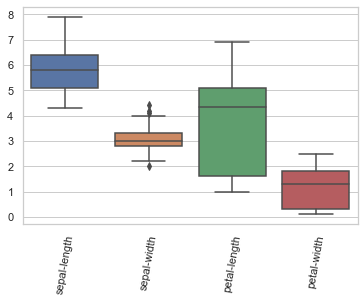

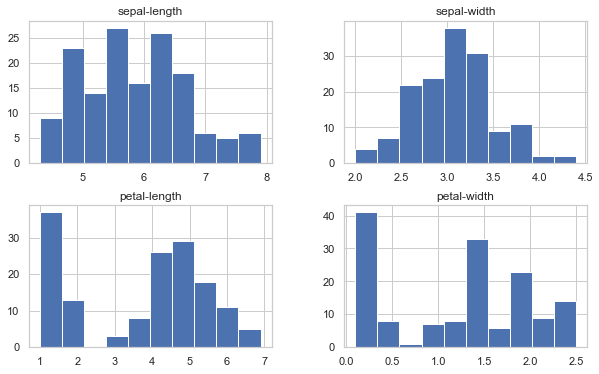

In [423]:
ax = sns.boxplot(data=iris_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=80)
iris_df.hist(figsize=(10,6))

array([[<AxesSubplot:title={'center':'class'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'malic-acid'}>,
        <AxesSubplot:title={'center':'ash'}>],
       [<AxesSubplot:title={'center':'alcalinity-of-ash'}>,
        <AxesSubplot:title={'center':'magnesium'}>,
        <AxesSubplot:title={'center':'total-phenols'}>,
        <AxesSubplot:title={'center':'flavanoids'}>],
       [<AxesSubplot:title={'center':'nonflavanoid-phenols'}>,
        <AxesSubplot:title={'center':'proanthocyanins'}>,
        <AxesSubplot:title={'center':'color-intensity'}>,
        <AxesSubplot:title={'center':'hue'}>],
       [<AxesSubplot:title={'center':'OD280/OD315-of-diluted-wines'}>,
        <AxesSubplot:title={'center':'proline'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

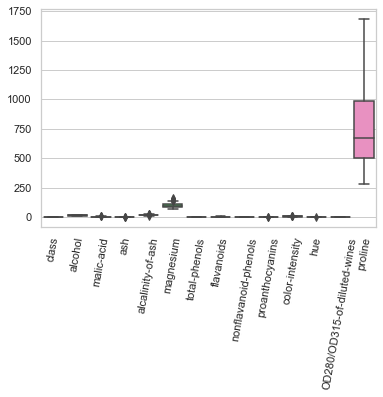

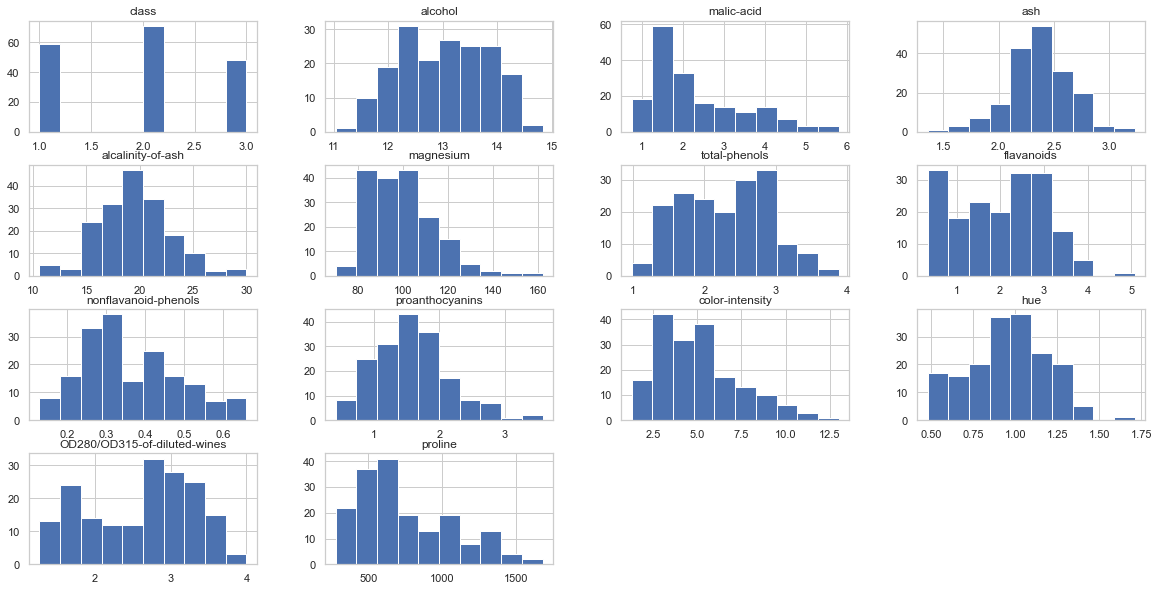

In [424]:
ax = sns.boxplot(data=wine_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=80)
wine_df.hist(figsize=(20,10))

array([[<AxesSubplot:title={'center':'sample-code-number'}>,
        <AxesSubplot:title={'center':'clump-thickness'}>,
        <AxesSubplot:title={'center':'uniformity-of-cell-size'}>],
       [<AxesSubplot:title={'center':'uniformity-of-cell-shape'}>,
        <AxesSubplot:title={'center':'marginal-adhesion'}>,
        <AxesSubplot:title={'center':'single-epithelial-cell-size'}>],
       [<AxesSubplot:title={'center':'bland-chromatin'}>,
        <AxesSubplot:title={'center':'normal-nucleoli'}>,
        <AxesSubplot:title={'center':'mitoses'}>],
       [<AxesSubplot:title={'center':'class'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

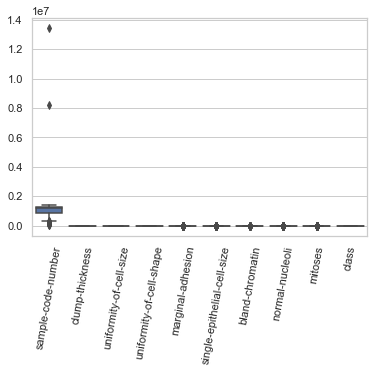

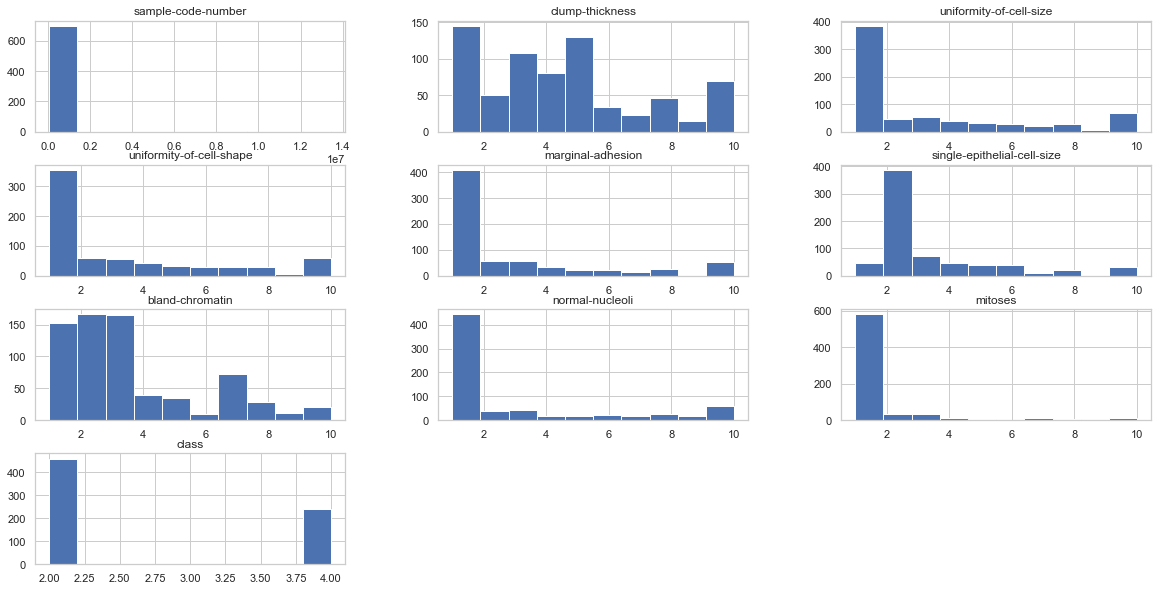

In [425]:
ax = sns.boxplot(data=cancer_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=80)
cancer_df.hist(figsize=(20,10))

#### Categorical data
Check datasets for catagorical data

In [426]:
iris_df.dtypes

sepal-length    float64
sepal-width     float64
petal-length    float64
petal-width     float64
class            object
dtype: object

In [428]:
wine_df.dtypes

class                             int64
alcohol                         float64
malic-acid                      float64
ash                             float64
alcalinity-of-ash               float64
magnesium                         int64
total-phenols                   float64
flavanoids                      float64
nonflavanoid-phenols            float64
proanthocyanins                 float64
color-intensity                 float64
hue                             float64
OD280/OD315-of-diluted-wines    float64
proline                           int64
dtype: object

In [429]:
cancer_df.dtypes

sample-code-number              int64
clump-thickness                 int64
uniformity-of-cell-size         int64
uniformity-of-cell-shape        int64
marginal-adhesion               int64
single-epithelial-cell-size     int64
bare-nuclei                    object
bland-chromatin                 int64
normal-nucleoli                 int64
mitoses                         int64
class                           int64
dtype: object

Because bare-nuclei column contains catagorical data we need to convert them into dummy/indicator variables.

In [430]:
cancer_df2 = pd.get_dummies(cancer_df,columns=['bare-nuclei'])
cancer_df2

,sample-code-number,clump-thickness,uniformity-of-cell-size,uniformity-of-cell-shape,marginal-adhesion,single-epithelial-cell-size,bland-chromatin,normal-nucleoli,mitoses,class,...,bare-nuclei_10,bare-nuclei_2,bare-nuclei_3,bare-nuclei_4,bare-nuclei_5,bare-nuclei_6,bare-nuclei_7,bare-nuclei_8,bare-nuclei_9,bare-nuclei_?
0,1000025,5,1,1,1,2,3,1,1,2,...,0,0,0,0,0,0,0,0,0,0
1,1002945,5,4,4,5,7,3,2,1,2,...,1,0,0,0,0,0,0,0,0,0
2,1015425,3,1,1,1,2,3,1,1,2,...,0,1,0,0,0,0,0,0,0,0
3,1016277,6,8,8,1,3,3,7,1,2,...,0,0,0,1,0,0,0,0,0,0
4,1017023,4,1,1,3,2,3,1,1,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,1,1,1,2,...,0,1,0,0,0,0,0,0,0,0
695,841769,2,1,1,1,2,1,1,1,2,...,0,0,0,0,0,0,0,0,0,0
696,888820,5,10,10,3,7,8,10,2,4,...,0,0,1,0,0,0,0,0,0,0
697,897471,4,8,6,4,3,10,6,1,4,...,0,0,0,1,0,0,0,0,0,0


### Methodology
We wanted to find out which algorithms will find the best neural network for our datasets. In order to use
the algorithms we need to split our dataset into test and train set and standarize the data.

#### Seperate the inputs from outputs 

In [431]:
iris_inputs = iris_df.iloc[:, iris_df.columns != 'class'].columns
iris_output = 'class'

In [432]:
wine_inputs = wine_df.iloc[:, wine_df.columns != 'class'].columns
wine_output = 'class'

In [433]:
cancer_inputs = cancer_df2.iloc[:, cancer_df2.columns != 'class'].columns
cancer_output = 'class'

In [434]:
# Import scikit-learn library that will perform the split of our data into training and testing sets
from sklearn.model_selection import train_test_split

In [435]:
test_size = 0.30
seed = 0 

#### Split the Iris dataset 

In [436]:
x_train_iris, x_test_iris, y_train_iris, y_test_iris = train_test_split(iris_df[iris_inputs], iris_df[iris_output], test_size=test_size, random_state=seed)

#### Split the wine dataset 

In [437]:
x_train_wine, x_test_wine, y_train_wine, y_test_wine = train_test_split(wine_df[wine_inputs], wine_df[wine_output], test_size=test_size, random_state=seed)

#### Split the breast cancer dataset

In [438]:
x_train_cancer, x_test_cancer, y_train_cancer, y_test_cancer = train_test_split(cancer_df2[cancer_inputs], cancer_df2[cancer_output], test_size=test_size, random_state=seed)

#### Data standardization
Since all our input data is numeric we can apply data standardization. This means that the mean value after standardization is going to be 0 and the standard deviation will be 1. Standardization across instances should be done after splitting the data between training and test set, using only the data from the training set.
This is to avoid any data leakage.

In [439]:
# Import scikit-learn standardization library
from sklearn.preprocessing import StandardScaler

In [440]:
x_train_iris[iris_inputs] = StandardScaler().fit_transform(x_train_iris[iris_inputs])
x_test_iris[iris_inputs] = StandardScaler().fit_transform(x_test_iris[iris_inputs])

In [441]:
x_train_wine[wine_inputs] = StandardScaler().fit_transform(x_train_wine[wine_inputs])
x_test_wine[wine_inputs] = StandardScaler().fit_transform(x_test_wine[wine_inputs])

In [442]:
x_train_cancer[cancer_inputs] = StandardScaler().fit_transform(x_train_cancer[cancer_inputs])
x_test_cancer[cancer_inputs] = StandardScaler().fit_transform(x_test_cancer[cancer_inputs])

## Installing scikit-learn compatible neuroevolution package

neuro-evolution is a package we created for the sake of simplicity.

This package contains:

    * NEATClassifier()
    * NEATRegressor()
    * WANNClassifier()
    * WANNRegressor()
    
In this notebook we will focus only on the two classifiers

In [6]:
!pip install neuro-evolution

Processing /Users/markomlakar/Library/Caches/pip/wheels/03/2e/d5/5049bd6ed70c8f6345e7fffbd2127ae307e5a1dc7d6a86e554/neuro_evolution-1.1.2-py3-none-any.whl
  Using cached neat_python-0.92-py3-none-any.whl (44 kB)
     |████████████████████████████████| 7.2 MB 4.0 MB/s eta 0:00:01
  Using cached joblib-0.16.0-py3-none-any.whl (300 kB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
You should consider upgrading via the '/Users/markomlakar/data-science/notebooks/sklearn-neuro-evolution/bin/python -m pip install --upgrade pip' command.


# Training the scikit-learn NEAT classifier
For the sake of keeping this notebook relativly clean statistic_reporter is disabled. If you wish to see progress for every generation set statistic_reporter=1 in the NEAT and WANN classifier constructor.

Note: Optimizing the algorithms can be done with setting the NEAT and WANN parameters!

In [9]:
# Import the NEAT and WANN classifier from neuro-evolution package we installed eariler.
# Visualization contains methods for ploting the fitness progress and drawing the final neural network
from neuro_evolution import WANNClassifier, NEATClassifier, visualization
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

### Iris dataset

In [153]:
# Create NEATClassifier model
neat_clf_iris = NEATClassifier(fitness_threshold=0.99, statistic_reporter=0 ,activation_mutate_rate=0.25,
                 activation_options='sigmoid relu tanh gauss')

# Train the algorithm
neat_clf_iris.fit(x_train_iris, y_train_iris)

Key: 6241
Fitness: 0.9904761904761905
Nodes:
	0 DefaultNodeGene(key=0, bias=-2.094082405099861, response=1.0, activation=tanh, aggregation=sum)
	1 DefaultNodeGene(key=1, bias=1.4332214868036364, response=1.0, activation=sigmoid, aggregation=sum)
	2 DefaultNodeGene(key=2, bias=-2.0019420262197967, response=1.0, activation=relu, aggregation=sum)
	1365 DefaultNodeGene(key=1365, bias=-1.4571876237335675, response=1.0, activation=sigmoid, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-4, 0), weight=-10.38761955742186, enabled=True)
	DefaultConnectionGene(key=(-4, 1), weight=-0.14870593557418396, enabled=True)
	DefaultConnectionGene(key=(-4, 2), weight=2.495965016572927, enabled=True)
	DefaultConnectionGene(key=(-3, 0), weight=0.04369609122297534, enabled=False)
	DefaultConnectionGene(key=(-3, 1), weight=0.2884069642217823, enabled=False)
	DefaultConnectionGene(key=(-3, 2), weight=2.1707402643401372, enabled=True)
	DefaultConnectionGene(key=(-3, 1365), weight=-0.4056239116525324,

In [ ]:
# Make predictions on unseen data
neat_result_iris = neat_clf_iris.predict(x_test_iris)

##### Visualize evolution
Visualize the fitness (accuracy) progress over generations

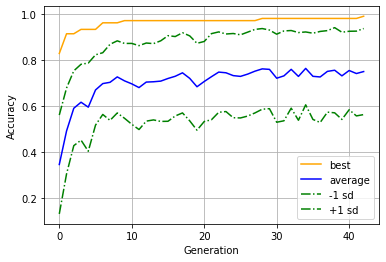

In [164]:
visualization.plot_stats(neat_clf_iris.stats_, ylog=False, view=True, xlabel='Generation', ylabel='Accuracy')

##### Visualize the evolved neural network
* Negative numbers - inputs
* Blue circles - outputs
* White circles - hidden nodes
* Green (solid) connection - active connection with positive weight value
* Red (solid) connection - active connection negative weight value
* Dotted connection - disconnected connection

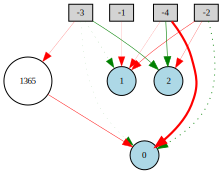

In [165]:
visualization.draw_net(neat_clf_iris.config_, neat_clf_iris.winner_genome_, True)

In [171]:
# Evaluate the model
print(classification_report(y_test_iris, neat_result_iris))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.89      0.94        18
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.96        45
      macro avg       0.95      0.96      0.95        45
   weighted avg       0.96      0.96      0.96        45



### Breast cancer dataset 


In [156]:
# Create NEATClassifier model
neat_clf_cancer = NEATClassifier(fitness_threshold=0.98, statistic_reporter=0)

# Train the algorithm
neat_clf_cancer.fit(x_train_cancer, y_train_cancer)

Key: 1420
Fitness: 0.9815950920245399
Nodes:
	0 DefaultNodeGene(key=0, bias=-1.0919713685233647, response=1.0, activation=sigmoid, aggregation=sum)
	1 DefaultNodeGene(key=1, bias=-0.46975085383735504, response=1.0, activation=sigmoid, aggregation=sum)
	167 DefaultNodeGene(key=167, bias=-2.7411787025063745, response=1.0, activation=sigmoid, aggregation=sum)
	270 DefaultNodeGene(key=270, bias=-0.026944169233321255, response=1.0, activation=sigmoid, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-20, 0), weight=0.38095228365133227, enabled=True)
	DefaultConnectionGene(key=(-19, 0), weight=-1.4000126767968313, enabled=False)
	DefaultConnectionGene(key=(-19, 1), weight=1.1441467956102316, enabled=True)
	DefaultConnectionGene(key=(-18, 0), weight=-0.4059995579648378, enabled=True)
	DefaultConnectionGene(key=(-18, 1), weight=1.3185317045199492, enabled=True)
	DefaultConnectionGene(key=(-17, 0), weight=1.553112141845658, enabled=False)
	DefaultConnectionGene(key=(-17, 1), weight=2.6

In [183]:
# Make predictions on unseen data
neat_result_cancer = neat_clf_cancer.predict(x_test_cancer)

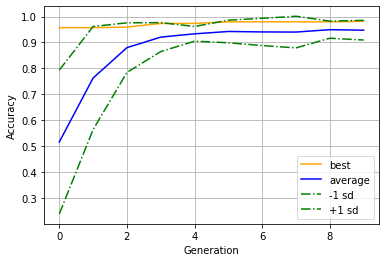

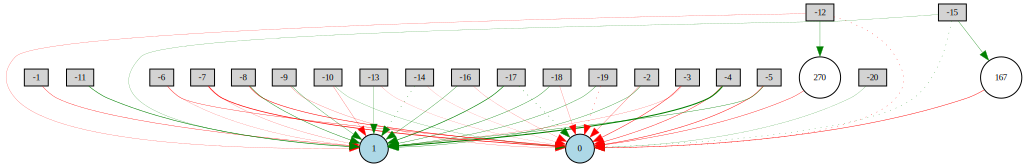

In [178]:
visualization.plot_stats(neat_clf_cancer.stats_, ylog=False, view=True, xlabel='Generation', ylabel='Accuracy')
visualization.draw_net(neat_clf_cancer.config_, neat_clf_cancer.winner_genome_, True)

In [172]:
# Evaluate the model
print(classification_report(y_test_cancer, neat_result_cancer))

              precision    recall  f1-score   support

           2       0.98      0.95      0.97       135
           4       0.91      0.97      0.94        75

    accuracy                           0.96       210
   macro avg       0.95      0.96      0.95       210
weighted avg       0.96      0.96      0.96       210



### Wine dataset

In [161]:
# Create NEATClassifier model
neat_clf_wine = NEATClassifier(fitness_threshold=1.0, statistic_reporter=0)

# Train the algorithm
neat_clf_wine.fit(x_train_wine, y_train_wine)

Key: 4124
Fitness: 1.0
Nodes:
	0 DefaultNodeGene(key=0, bias=3.118899156515013, response=1.0, activation=sigmoid, aggregation=sum)
	1 DefaultNodeGene(key=1, bias=0.4911810510257403, response=1.0, activation=sigmoid, aggregation=sum)
	2 DefaultNodeGene(key=2, bias=0.3593958301139362, response=1.0, activation=sigmoid, aggregation=sum)
	841 DefaultNodeGene(key=841, bias=0.3448079898416735, response=1.0, activation=sigmoid, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-13, 0), weight=7.66202727715676, enabled=True)
	DefaultConnectionGene(key=(-13, 1), weight=-2.7087546165125844, enabled=True)
	DefaultConnectionGene(key=(-13, 2), weight=1.8788283652867845, enabled=True)
	DefaultConnectionGene(key=(-12, 0), weight=0.5610608091345304, enabled=True)
	DefaultConnectionGene(key=(-12, 2), weight=-0.8325719910710869, enabled=True)
	DefaultConnectionGene(key=(-11, 0), weight=0.22764951365197852, enabled=True)
	DefaultConnectionGene(key=(-11, 1), weight=5.154777994764929, enabled=True)


In [180]:
# Make predictions on unseen data
neat_result_wine = neat_clf_wine.predict(x_test_wine)

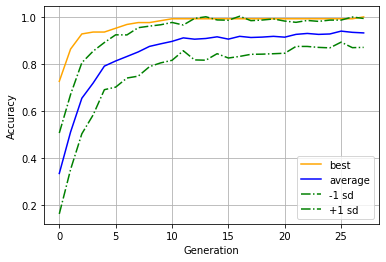

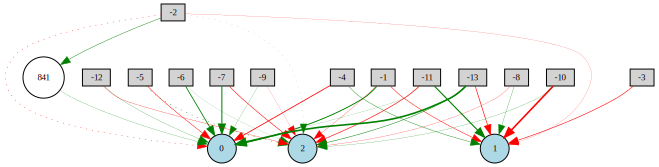

In [181]:
visualization.plot_stats(neat_clf_wine.stats_, ylog=False, view=True, xlabel='Generation', ylabel='Accuracy')
visualization.draw_net(neat_clf_wine.config_, neat_clf_wine.winner_genome_, True)

In [182]:
# Evaluate the model
print(classification_report(y_test_wine, neat_result_wine))

              precision    recall  f1-score   support

           1       0.90      1.00      0.95        19
           2       1.00      0.91      0.95        22
           3       1.00      1.00      1.00        13

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.97      0.96      0.96        54



# Training the scikit-learn WANN classifier
In these experiments we used a fixed series of weight values (-2, -1, -0.5, +0.5, +1, +2) which are passed to the WANN constructor.

In [72]:
single_shared_weights = [ -2.0, -1.0, -0.5, 0.5, 1.0, 2.0 ]

### Iris dataset

In [73]:
# Create a WANN model for Iris dataset
wann_clf_iris = WANNClassifier(single_shared_weights=single_shared_weights,
                     fitness_threshold=0.90,
                     number_of_generations=500,
                     pop_size=150,
                     compatibility_threshold=2.0,
                     activation_default='relu',
                     statistic_reporter = 0)

# Train the algorithm
wann_clf_iris.fit(x_train_iris, y_train_iris)

Key: 11415
Fitness: 0.9079365079365079
Nodes:
	0 DefaultNodeGene(key=0, bias=0.3472960649370353, response=1.0, activation=abs, aggregation=sum)
	1 DefaultNodeGene(key=1, bias=1.1463040791975798, response=1.0, activation=tanh, aggregation=sum)
	2 DefaultNodeGene(key=2, bias=0.6305143449161321, response=1.0, activation=relu, aggregation=sum)
	485 DefaultNodeGene(key=485, bias=0.2556792724372083, response=1.0, activation=tanh, aggregation=sum)
	1194 DefaultNodeGene(key=1194, bias=-0.042988286733011236, response=1.0, activation=clamped, aggregation=sum)
	1241 DefaultNodeGene(key=1241, bias=-0.29750217290834663, response=1.0, activation=inv, aggregation=sum)
	1827 DefaultNodeGene(key=1827, bias=0.7155921211450372, response=1.0, activation=relu, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-4, 0), weight=2.0, enabled=True)
	DefaultConnectionGene(key=(-4, 1), weight=2.0, enabled=True)
	DefaultConnectionGene(key=(-4, 485), weight=2.0, enabled=True)
	DefaultConnectionGene(key=(-4, 

WANNClassifier(activation_default='relu', compatibility_threshold=2.0,
               fitness_threshold=0.9, number_of_generations=500,
               single_shared_weights=[-2.0, -1.0, -0.5, 0.5, 1.0, 2.0],
               statistic_reporter=0)

##### Visualize evolution
Visualize the fitness (accuracy) progress over generations.
* max - best accuracy achieved by with a single shared weight from a set (-2, -1, -0.5, +0.5, +1, +2)
* mean - mean accuracy over all weights in a set
* average - average accuracy of the population

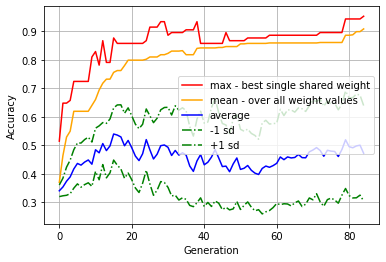

In [184]:
visualization.plot_stats(wann_clf_iris.stats_, ylog=False, view=True, xlabel='Generation', ylabel='Accuracy')

##### Visualize the evolved neural network

The WANN algorithm strives to achieve a minimal network that will work with a single shared weight. Here we can see that the algorithm performed feature selection since two inputs are not connected.

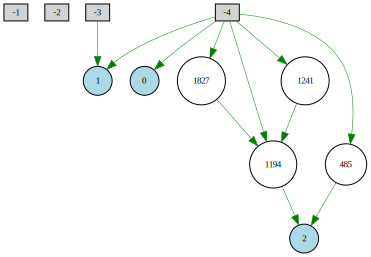

In [185]:
visualization.draw_net(wann_clf_iris.config_, wann_clf_iris.winner_genome_, True)

In [448]:
neat_clf_iris

NEATClassifier(activation_mutate_rate=0.25,
               activation_options='sigmoid relu tanh gauss',
               fitness_threshold=0.99, statistic_reporter=0)

Evaluate the model on wider range of weights that were not used in training. This is to show that created neural networks can perform well even outside the training weights.

In [197]:
shared_weights = [-3.0, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 3.0]
# Create a dictionary for storing accuracy values per single shared weight
fitness_per_weight_iris = {}
for weight in shared_weights:
    wann_result = wann_clf_iris.predict(x_test_iris, weight)
    fitness_per_weight_iris.update({str(weight): accuracy_score(y_test_iris, wann_result)})

### Breast cancer dataset 


In [76]:
wann_clf_cancer = WANNClassifier(single_shared_weights=single_shared_weights,
                         fitness_threshold=0.90,
                         number_of_generations=500,
                         pop_size=150,
                         compatibility_threshold=1.5,
                         activation_default='relu',
                          statistic_reporter = 0)
wann_clf_cancer.fit(x_train_cancer, y_train_cancer)

Key: 2851
Fitness: 0.9113837764144512
Nodes:
	0 DefaultNodeGene(key=0, bias=0.40944322647942194, response=1.0, activation=abs, aggregation=sum)
	1 DefaultNodeGene(key=1, bias=-0.1121817085701089, response=1.0, activation=abs, aggregation=sum)
	327 DefaultNodeGene(key=327, bias=2.361672528918568, response=1.0, activation=relu, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-20, 1), weight=2.0, enabled=True)
	DefaultConnectionGene(key=(-19, 0), weight=2.0, enabled=True)
	DefaultConnectionGene(key=(-19, 1), weight=2.0, enabled=True)
	DefaultConnectionGene(key=(-17, 0), weight=2.0, enabled=True)
	DefaultConnectionGene(key=(-17, 1), weight=2.0, enabled=True)
	DefaultConnectionGene(key=(-16, 0), weight=2.0, enabled=True)
	DefaultConnectionGene(key=(-16, 1), weight=2.0, enabled=True)
	DefaultConnectionGene(key=(-14, 0), weight=2.0, enabled=True)
	DefaultConnectionGene(key=(-14, 1), weight=2.0, enabled=True)
	DefaultConnectionGene(key=(-13, 1), weight=2.0, enabled=False)
	DefaultCon

WANNClassifier(activation_default='relu', compatibility_threshold=1.5,
               fitness_threshold=0.9, number_of_generations=500,
               single_shared_weights=[-2.0, -1.0, -0.5, 0.5, 1.0, 2.0],
               statistic_reporter=0)

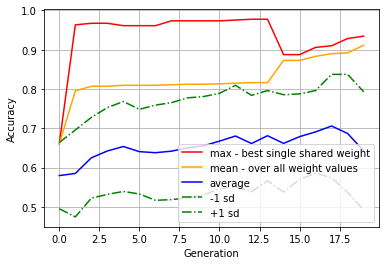

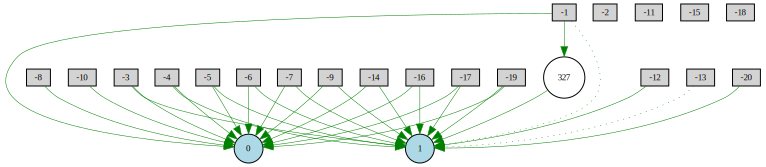

In [77]:
visualization.plot_stats(wann_clf_cancer.stats_, ylog=False, view=True, xlabel='Generation', ylabel='Accuracy')
visualization.draw_net(wann_clf_cancer.config_, wann_clf_cancer.winner_genome_, True)

In [196]:
shared_weights = [-3.0, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 3.0]
fitness_per_weight_cancer = {}
for weight in shared_weights:
    wann_result = wann_clf_cancer.predict(x_test_cancer, weight)
    fitness_per_weight_cancer.update({str(weight): accuracy_score(y_test_cancer, wann_result)})

### Wine dataset

In [100]:
wann_clf_wine = WANNClassifier(single_shared_weights=single_shared_weights,
                         fitness_threshold=0.91,
                         number_of_generations=500,
                         pop_size=150,
                         compatibility_threshold=1.0,
                         activation_default='relu',
                         statistic_reporter = 0)
wann_clf_wine.fit(x_train_wine, y_train_wine)

Key: 30593
Fitness: 0.9139784946236559
Nodes:
	0 DefaultNodeGene(key=0, bias=-0.37619525847367397, response=1.0, activation=abs, aggregation=sum)
	1 DefaultNodeGene(key=1, bias=-0.12515546345199013, response=1.0, activation=abs, aggregation=sum)
	2 DefaultNodeGene(key=2, bias=-0.3960777224999118, response=1.0, activation=abs, aggregation=sum)
	3176 DefaultNodeGene(key=3176, bias=-1.2323429153583014, response=1.0, activation=clamped, aggregation=sum)
	4085 DefaultNodeGene(key=4085, bias=1.4114458386545001, response=1.0, activation=abs, aggregation=sum)
	4923 DefaultNodeGene(key=4923, bias=-0.7602459485805022, response=1.0, activation=sigmoid, aggregation=sum)
	5108 DefaultNodeGene(key=5108, bias=-1.451468244370118, response=1.0, activation=gauss, aggregation=sum)
	5228 DefaultNodeGene(key=5228, bias=-0.9771292902126164, response=1.0, activation=relu, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-13, 0), weight=2.0, enabled=True)
	DefaultConnectionGene(key=(-13, 1), weight=2

WANNClassifier(activation_default='relu', compatibility_threshold=1.0,
               fitness_threshold=0.91, number_of_generations=500,
               single_shared_weights=[-2.0, -1.0, -0.5, 0.5, 1.0, 2.0],
               statistic_reporter=0)

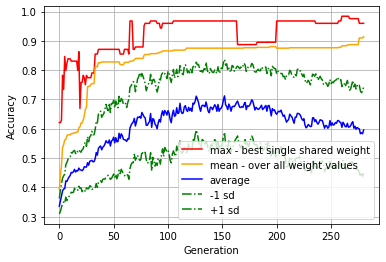

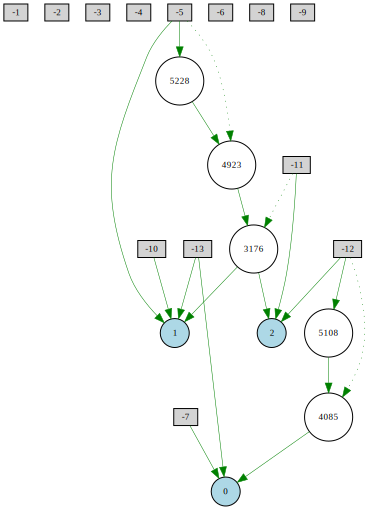

In [101]:
visualization.plot_stats(wann_clf_wine.stats_, ylog=False, view=True, xlabel='Generation', ylabel='Accuracy')
visualization.draw_net(wann_clf_wine.config_, wann_clf_wine.winner_genome_, True)

In [194]:
shared_weights = [-3.0, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 3.0]
fitness_per_weight_wine = {}
for weight in shared_weights:
    wann_result = wann_clf_wine.predict(x_test_wine, weight)
    fitness_per_weight_wine.update({str(weight): accuracy_score(y_test_wine, wann_result)})

### Display fitness (accuracy) by single shared weights for all datasets 

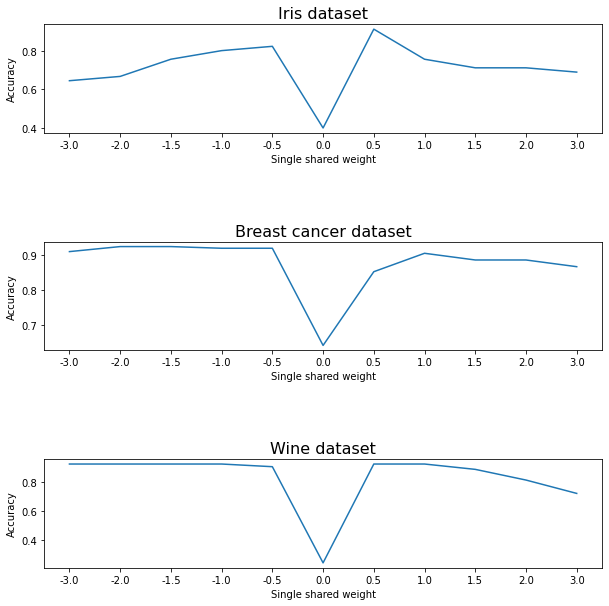

In [198]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10,10))
ax1.plot(list(fitness_per_weight_iris.keys()), list(fitness_per_weight_iris.values()))
ax2.plot(list(fitness_per_weight_cancer.keys()), list(fitness_per_weight_cancer.values()))
ax3.plot(list(fitness_per_weight_wine.keys()), list(fitness_per_weight_wine.values()))
ax1.set_title('Iris dataset', size =16)
ax2.set_title('Breast cancer dataset', size =16)
ax3.set_title('Wine dataset', size =16)
ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Accuracy')
ax3.set_ylabel('Accuracy')
ax1.set_xlabel('Single shared weight')
ax2.set_xlabel('Single shared weight')
ax3.set_xlabel('Single shared weight')
plt.subplots_adjust(hspace=1)
plt.show()

We can see that not all weights work well for different tasks. We can also see that the 1.5 and 3.0 weight values were not present in training and the neural networks still performs well with those values.

# Evaluation of NEAT and WANNs
All models were evaulated with accuracy classification score.

In [310]:
# IRIS
iris_accuracy = {'NEAT': [accuracy_score(y_test_iris, neat_result_iris)],
                 'WANN':  [accuracy_score(y_test_iris, wann_clf_iris.predict(x_test_iris, 0.5))]
                }
iris_accuracy_frame = pd.DataFrame(data = iris_accuracy)

# Breast cancer
cancer_accuracy = {'NEAT': [accuracy_score(y_test_cancer, neat_result_cancer)],
                 'WANN':  [accuracy_score(y_test_cancer, wann_clf_cancer.predict(x_test_cancer, -2.0))]
                }
cancer_accuracy_frame = pd.DataFrame(data = cancer_accuracy)

# Wine
wine_accuracy = {'NEAT': [accuracy_score(y_test_wine, neat_result_wine)],
                 'WANN':  [accuracy_score(y_test_wine, wann_clf_wine.predict(x_test_wine, -2.0))]
                }
wine_accuracy_frame = pd.DataFrame(data = wine_accuracy)

##### Iris dataset 

(0.8, 1.0)

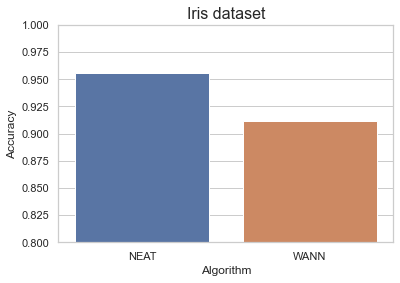

In [311]:
sns.set(style="whitegrid")
sns.barplot(data=iris_accuracy_frame)
plt.title('Iris dataset', size =16)
plt.ylabel('Accuracy')
plt.xlabel('Algorithm')
plt.ylim(0.80, 1.0)

In [312]:
# NEAT
print(classification_report(y_test_iris, neat_result_iris))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.89      0.94        18
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.96        45
      macro avg       0.95      0.96      0.95        45
   weighted avg       0.96      0.96      0.96        45



In [313]:
# WANN
print(classification_report(y_test_iris, wann_clf_iris.predict(x_test_iris, 0.5)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.88      0.93        16
Iris-versicolor       0.85      0.94      0.89        18
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.91        45
      macro avg       0.92      0.91      0.91        45
   weighted avg       0.92      0.91      0.91        45



##### Breast cancer dataset 

(0.8, 1.0)

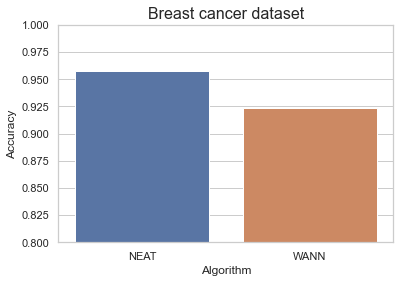

In [314]:
sns.set(style="whitegrid")
sns.barplot(data=cancer_accuracy_frame)
plt.title('Breast cancer dataset', size =16)
plt.ylabel('Accuracy')
plt.xlabel('Algorithm')
plt.ylim(0.80, 1.0)

In [315]:
# NEAT
print(classification_report(y_test_cancer, neat_result_cancer))

              precision    recall  f1-score   support

           2       0.98      0.95      0.97       135
           4       0.91      0.97      0.94        75

    accuracy                           0.96       210
   macro avg       0.95      0.96      0.95       210
weighted avg       0.96      0.96      0.96       210



In [316]:
# WANN
print(classification_report(y_test_cancer, wann_clf_cancer.predict(x_test_cancer, -2.0)))

              precision    recall  f1-score   support

           2       0.98      0.90      0.94       135
           4       0.85      0.96      0.90        75

    accuracy                           0.92       210
   macro avg       0.91      0.93      0.92       210
weighted avg       0.93      0.92      0.92       210



##### Wine dataset 

(0.8, 1.0)

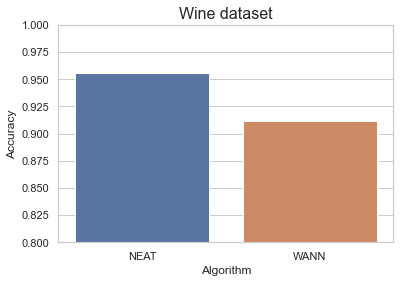

In [317]:
sns.set(style="whitegrid")
sns.barplot(data=iris_accuracy_frame)
plt.title('Wine dataset', size =16)
plt.ylabel('Accuracy')
plt.xlabel('Algorithm')
plt.ylim(0.80, 1.0)

In [318]:
# NEAT
print(classification_report(y_test_wine, neat_result_wine))

              precision    recall  f1-score   support

           1       0.90      1.00      0.95        19
           2       1.00      0.91      0.95        22
           3       1.00      1.00      1.00        13

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.97      0.96      0.96        54



In [319]:
# WANN
print(classification_report(y_test_wine, wann_clf_wine.predict(x_test_wine, -2.0)))

              precision    recall  f1-score   support

           1       0.86      1.00      0.93        19
           2       1.00      0.82      0.90        22
           3       0.93      1.00      0.96        13

    accuracy                           0.93        54
   macro avg       0.93      0.94      0.93        54
weighted avg       0.93      0.93      0.92        54



# Summary

The implementation of NEAT and WANNs is quite similar since WANNs are based on NEAT with the addition of multi-objective optimization of maximum fitness value, mean fitness value, and the number of connections over single shared weight values. Looking at the results we can see that NEAT can evolve an optimal solution in fewer generations and it can achieve higher accuracy than WANNs since it optimizes the weights and structure of networks simultaneously whereas WANNs optimize only the structure. WANNs can achieve higher than chance accuracy and also in a sense optimize the number of features. This is due to initial populations being sparsely connected networks (Note: this can also be achieved in NEAT by setting the initial_connection parameter to fs_neat_nohidden).
The original paper on WANNs conducted experiments on MNIST classification but here we made it compatible with scikit-learn and tried it on more 'data science' type of experiments. 